<a href="https://colab.research.google.com/github/rsoft-latam/masters-in-data-science/blob/main/Tutorial_1_Programaci%C3%B3n_Orientada_a_Objetos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SOLUCIONARIO**

## **Ejercicio 1:** Atención de Emergencias
Desde un registro de quejas generadas desde la línea de atención a emergencias, se requiere identificar a las zonas afectadas por deslizamientos. Debido a la repetición de ubicaciones, se requiere que escriba un programa Python para eliminar todos los duplicados de una lista determinada de cadenas y devolver una lista de cadenas únicas. Utilice el tipo de datos sets de Python para resolver el ejercicio. Puede crear un conjunto de quejas escritas de ejemplo.

In [ ]:
from typing import List

def remove_duplicates(string_list: List[str]) -> List[str]:
  """
    Removes duplicate strings from a list.

    Args:
        string_list (list): List of strings.

    Returns:
        list: Unique strings.
  """
  return list(set(string_list))

# Example
complaints: List[str] = [
    "Deslizamiento en la Av. Bolivia",
    "Inundación en la calle Beni",
    "Deslizamiento en la Av. Bolivia",
    "Incendio en la zona Equipetrol",
    "Deslizamiento en la Av. Bolivia",
    "Inundación en la calle Beni"
]

affected_areas: List[str] = remove_duplicates(complaints)
affected_areas


['Inundación en la calle Beni',
 'Deslizamiento en la Av. Bolivia',
 'Incendio en la zona Equipetrol']

## **Ejercicio 2:** Tesis de Postgrado

Mediante uso de estructuras de datos, crear un programa que le permita a la biblioteca de la UAGRM SOE gestionar las tesis de postgrado. El programa debe ser capaz de realizar las siguientes operaciones:
-  Agregar una nueva tesis: El usuario debe poder ingresar los detalles de una nueva tesis, como título, autor, tutor, carrera, grado académico, año, y cantidad de copias físicas disponible.
-  Buscar una tesis: El usuario debe poder buscar una tesis por título, autor o carrera. El programa debe mostrar los detalles de la tesis si se encuentra.
-  Actualizar la información de una tesis: El usuario debe poder modificar los detalles de una tesis existente.
-  Eliminar una tesis: El usuario debe poder eliminar una tesis del inventario.
-  Listar todas las tesis: El programa debe poder mostrar una lista de todas las tesis en el inventario, junto con sus detalles.

Implementar el programa considerando que algunas carreras en la universidad permiten que dos tesistas puedan trabajar en una misma tesis y que la mayoría de las carreras asignan dos tutores a un mismo proyecto (uno conocido como tutor y otro como relator), por lo que se deberá guardar estos datos en listas. También se sugiere Implementa un menú de opciones para que el usuario pueda interactuar fácilmente con el programa.



In [ ]:
from typing import List

class Thesis:
    def __init__(self, title: str, authors: List[str], advisors: List[str], major: str, degree: str, year: int, copies: int):
        self.title = title
        self.authors = authors
        self.advisors = advisors
        self.major = major
        self.degree = degree
        self.year = year
        self.copies = copies

    def show_details(self) -> None:
        print("Thesis details:")
        print("Title:", self.title)
        print("Authors:", ", ".join(self.authors))
        print("Advisors:", ", ".join(self.advisors))
        print("Major:", self.major)
        print("Degree:", self.degree)
        print("Year:", self.year)
        print("Available copies:", self.copies)


def add_thesis(thesis_list: List[Thesis]) -> None:
    title: str = input("Enter the thesis title: ")
    authors: List[str] = input("Enter the authors (comma-separated): ").split(",")
    advisors: List[str] = input("Enter the advisors (comma-separated): ").split(",")
    major: str = input("Enter the major: ")
    degree: str = input("Enter the academic degree: ")
    year: int = int(input("Enter the year: "))
    copies: int = int(input("Enter the number of copies: "))
    thesis = Thesis(title, authors, advisors, major, degree, year, copies)
    thesis_list.append(thesis)
    print("Thesis successfully added.")


def search_thesis(thesis_list: List[Thesis]) -> None:
    criterion: str = input("Search by (title, author, major): ").lower()
    term: str = input("Enter the search term: ")

    results: List[str] = []
    for thesis in thesis_list:
        if criterion == "title" and term.lower() in thesis.title.lower():
            results.append(thesis)
        elif criterion == "author" and any(term.lower() in author.lower() for author in thesis.authors):
            results.append(thesis)
        elif criterion == "major" and term.lower() in thesis.major.lower():
            results.append(thesis)

    if results:
        for thesis in results:
            thesis.show_details()
            print("-" * 20)
    else:
        print("No theses matched the search criteria.")


def update_thesis(thesis_list: List[Thesis]) -> None:
    title: str = input("Enter the title of the thesis to update: ")
    for thesis in thesis_list:
        if thesis.title.lower() == title.lower():
            thesis.title = input("New title (leave blank to keep current): ") or thesis.title
            thesis.authors = input("New authors (comma-separated, leave blank to keep current): ").split(",") or thesis.authors
            thesis.advisors = input("New advisors (comma-separated, leave blank to keep current): ").split(",") or thesis.advisors
            thesis.major = input("New major (leave blank to keep current): ") or thesis.major
            thesis.degree = input("New degree (leave blank to keep current): ") or thesis.degree
            try:
                thesis.year = int(input("New year (leave blank to keep current): ") or thesis.year)
            except ValueError:
                print("Invalid year, keeping previous value.")
            try:
                thesis.copies = int(input("New number of copies (leave blank to keep current): ") or thesis.copies)
            except ValueError:
                print("Invalid number of copies, keeping previous value.")

            print("Thesis successfully updated.")
            return
    print("Thesis not found.")


def delete_thesis(thesis_list: List[Thesis]) -> None:
    title: str = input("Enter the title of the thesis to delete: ")
    for i, thesis in enumerate(thesis_list):
        if thesis.title.lower() == title.lower():
            del thesis_list[i]
            print("Thesis successfully deleted.")
            return
    print("Thesis not found.")


def list_theses(thesis_list: List[Thesis]) -> None:
    if not thesis_list:
        print("No theses registered.")
        return
    for thesis in thesis_list:
        thesis.show_details()
        print("-" * 20)


def main():
    thesis_list: List[Thesis] = []
    while True:
        print("\nOptions Menu:")
        print("1. Add a new thesis")
        print("2. Search for a thesis")
        print("3. Update thesis information")
        print("4. Delete a thesis")
        print("5. List all theses")
        print("6. Exit")
        option = input("Enter an option: ")
        if option == "1":
            add_thesis(thesis_list)
        elif option == "2":
            search_thesis(thesis_list)
        elif option == "3":
            update_thesis(thesis_list)
        elif option == "4":
            delete_thesis(thesis_list)
        elif option == "5":
            list_theses(thesis_list)
        elif option == "6":
            break
        else:
            print("Invalid option.")


if __name__ == "__main__":
    main()




Options Menu:
1. Add a new thesis
2. Search for a thesis
3. Update thesis information
4. Delete a thesis
5. List all theses
6. Exit
Enter an option: 6


## **Ejercicio 3:** Diagrama de clases

Los diagramas de clases son uno de los tipos de diagramas más útiles en UML, ya que trazan claramente la estructura de un sistema concreto al modelar sus clases, atributos, operaciones y relaciones entre objetos. En la siguiente imagen podrás ver un ejemplo de este tipo de diagramas:

<center>
<img src='https://drive.google.com/uc?id=1PcpB5ExCfsMPSA5zTdkJ0XcohpH193Oj' >
</center>

Este diagrama proviene de la siguiente especificación:

- Una aplicación necesita almacenar información sobre empresas, sus empleados y sus clientes. Ambos se caracterizan por su nombre y edad.
- Los empleados tienen un sueldo bruto, los empleados que son directivos tienen una categoría, así como un conjunto de empleados subordinados.
- De los clientes además se necesita conocer su teléfono de contacto.
- La aplicación necesita mostrar los datos de empleados y clientes

Para este ejercicio, deberás traducir el diagrama de clases hacia código en Python. Se espera que también realices la implementación de las funciones definidas en el diagrama, sin embargo, su definción dependera de tu criterio.


In [ ]:
from typing import List

class Person:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def show(self) -> str:
        return f"Name: {self.name}, Age: {self.age}"


class Client(Person):
    def __init__(self, name: str, age: int, contact_phone: int):
        super().__init__(name, age)
        self.contact_phone = contact_phone

    def show(self):
        return f"{super().show()}, Phone: {self.contact_phone}"


class Employee(Person):
    def __init__(self, name: str, age: int, gross_salary: float):
        super().__init__(name, age)
        self.gross_salary = gross_salary

    def calculate_net_salary(self) -> float:
        # Assuming a flat tax rate of 20%
        taxes: float = self.gross_salary * 0.2
        return self.gross_salary - taxes

    def show(self) -> str:
        return f"{super().show()}, Gross Salary: {self.gross_salary}, Net Salary: {self.calculate_net_salary()}"


class Executive(Employee):
    def __init__(self, name: str, age: int, gross_salary: float, category: str):
        super().__init__(name, age, gross_salary)
        self.category = category
        self.subordinates: List[Employee] = []

    def add_subordinate(self, employee: Employee) -> None:
        if isinstance(employee, Employee):
            self.subordinates.append(employee)

    def show(self) -> str:
        return f"{super().show()}, Category: {self.category}, Subordinates: {[sub.name for sub in self.subordinates]}"


class Company:
    def __init__(self, name: str):
        self.name = name
        self.employees: List[Employee] = []
        self.clients: List[Client] = []

    def add_employee(self, employee: Employee) -> None:
        if isinstance(employee, Employee):
            self.employees.append(employee)

    def add_client(self, client: Client) -> None:
        if isinstance(client, Client):
            self.clients.append(client)

    def show(self) -> str:
        return f"Company: {self.name}, Employees: {[emp.name for emp in self.employees]}, Clients: {[cli.name for cli in self.clients]}"


## **Ejercicio 4:** La biblioteca

Diseñe un diagrama de clases para el siguiente caso e implemente su respectiva POO con Python:

> Una biblioteca universitaria contiene libros. Hay múltiples copias de algunos libros. Algunos libros están disponibles para préstamo de una semana solamente, pero todos los demás libros pueden ser prestados por tres semanas generalmente. Los miembros de la biblioteca pueden tomar prestados hasta cuatro libros a la vez, y los miembros del personal pueden tomar prestamos de hasta doce libros. Los miembros de la biblioteca y los miembros del personal deben devolver luego los libros a la biblioteca como cualquier otro usuario.

Se sugiere considerar a los sustantivos como posibles objetos y a las acciones como posibles funciones.


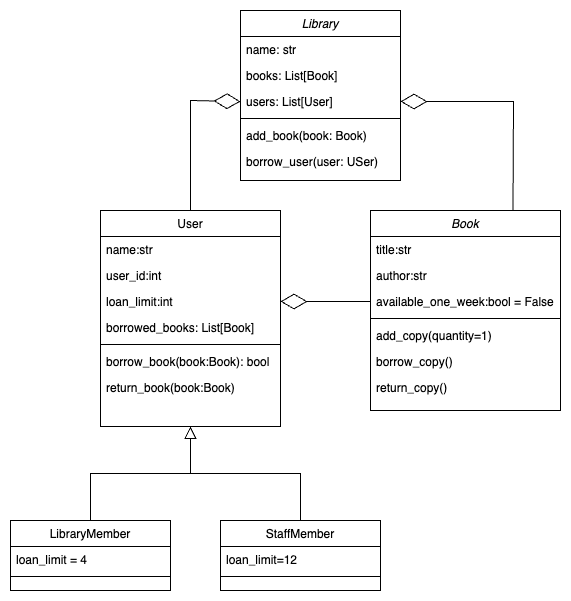

In [ ]:
from typing import List

class Book:
    def __init__(self, title: str, author: str, available_one_week=False):
        self.title = title
        self.author = author
        self.available_one_week = available_one_week
        self.available_copies: int = 0

    def add_copy(self, quantity=1) -> None:
        self.available_copies += quantity

    def borrow_copy(self):
        if self.available_copies > 0:
            self.available_copies -= 1
            return True
        else:
            return False

    def return_copy(self) -> None:
        self.available_copies += 1

    def __str__(self) -> str:
        return f"Title: {self.title}, Author: {self.author}, Available for one week: {self.available_one_week}, Available copies: {self.available_copies}"


class User:
    def __init__(self, name: str, user_id: int, loan_limit: int):
        self.name = name
        self.user_id = user_id
        self.loan_limit = loan_limit
        self.borrowed_books: List[Book] = []

    def borrow_book(self, book: Book) -> bool:
        if len(self.borrowed_books) < self.loan_limit and book.borrow_copy():
            self.borrowed_books.append(book)
            print(f"{self.name} has borrowed: {book.title}")
            return True
        else:
            print(f"Could not borrow the book {book.title}")
            return False

    def return_book(self, book: Book) -> None:
        if book in self.borrowed_books:
            self.borrowed_books.remove(book)
            book.return_copy()
            print(f"{self.name} has returned: {book.title}")
        else:
            print(f"{self.name} does not have the book {book.title}")

    def __str__(self) -> str:
        return f"Name: {self.name}, ID: {self.user_id}, Loan limit: {self.loan_limit}"


class LibraryMember(User):
    def __init__(self, name: str, user_id: int):
        super().__init__(name, user_id, loan_limit=4)


class StaffMember(User):
    def __init__(self, name: int, user_id: int):
        super().__init__(name, user_id, loan_limit=12)


class Library:
    def __init__(self, name: str):
        self.name = name
        self.books: List[Book] = []
        self.users: List[User] = []

    def add_book(self, book: Book) -> None:
        self.books.append(book)

    def add_user(self, user: User) -> None:
        self.users.append(user)


# Example
library = Library("Libreria La Paz")

book1 = Book("Don Quixote", "Cervantes")
book1.add_copy(3)
book2 = Book("One Hundred Years of Solitude", "García Márquez", available_one_week=True)
book2.add_copy(2)

library.add_book(book1)
library.add_book(book2)

member1 = LibraryMember("Juan Pérez", "12345")
member2 = StaffMember("Ana García", "67890")

library.add_user(member1)
library.add_user(member2)

member1.borrow_book(book1)
member1.borrow_book(book1)
member1.borrow_book(book1)
member1.borrow_book(book1)
member1.borrow_book(book1)  # This loan will not be processed as the limit is reached

member2.borrow_book(book2)
member2.borrow_book(book2)
member2.borrow_book(book2)

member1.return_book(book1)

print(book1)
print(book2)
print(member1)
print(member2)


Juan Pérez has borrowed: Don Quixote
Juan Pérez has borrowed: Don Quixote
Juan Pérez has borrowed: Don Quixote
Could not borrow the book Don Quixote
Could not borrow the book Don Quixote
Ana García has borrowed: One Hundred Years of Solitude
Ana García has borrowed: One Hundred Years of Solitude
Could not borrow the book One Hundred Years of Solitude
Juan Pérez has returned: Don Quixote
Title: Don Quixote, Author: Cervantes, Available for one week: False, Available copies: 1
Title: One Hundred Years of Solitude, Author: García Márquez, Available for one week: True, Available copies: 0
Name: Juan Pérez, ID: 12345, Loan limit: 4
Name: Ana García, ID: 67890, Loan limit: 12


## **Ejercicio 5:** El colegio 2

Un colegio fiscal se propuso implementar un servidor local para la gestión de cuentas institucionales de docentes y estudiantes, los cuales requieren un correo electrónico y una contraseña. Cada vez que un usuario es creado, se requiere un algoritmo para asignar nuevas cuentas de correo electrónico que no se repitan con cuentas creadas anteriormente. Para esto, cada usuario ingresara sus primer nombre, su segundo y tercer nombre (en caso de existir), su apellido paterno, su apellido materno  y su número de carnet de identidad al momento de crear su cuenta. El identificador de la cuenta de email generado deberá estar compuesto por los primeros dos caracteres del primer nombre, el primer apellido completo y los dos primeros dígitos de la cedula de identidad. Cada correo deberá finalizar con el siguiente texto “@cesma.edu.bo”.

Ejemplo de entrada:
Ingrese su primer nombre: Jose
Ingrese su segundo/tercer nombre: Mario
Ingrese su primer apellido: Ochoa
Ingrese su segundo apellido: Carrasco
Ingrese su carnet de identidad: 5345559

Ejemplo de salida:
El correo electrónico del empleado es: joochoa53@cesma.edu.bo

Diseñe el diagrama de clases e implemente el programa respectivo para resolver este caso.


In [ ]:
class User:
    def __init__(self, first_name: str, middle_name: str, third_name: str, last_name: str, second_last_name: str, ci: int):
        self.first_name = first_name
        self.middle_name = middle_name
        self.third_name = third_name
        self.last_name = last_name
        self.second_last_name = second_last_name
        self.ci = ci
        self.email = self.generate_email()

    def generate_email(self) -> str:
        first_two_letters: str = self.first_name[:2].lower()
        email: str = first_two_letters + self.last_name.lower() + str(self.ci)[:2] + "@cesma.edu.bo"
        return email

def main():
    first_name: str = input("Enter your first name: ")
    middle_name: str = input("Enter your middle/third name: ")
    third_name: str = input("Enter your third name (optional, press Enter if not applicable): ")
    last_name: str = input("Enter your first last name: ")
    second_last_name: str = input("Enter your second last name: ")
    ci: int = int(input("Enter your CI: "))

    user = User(first_name, middle_name, third_name, last_name, second_last_name, ci)
    print(f"The user's email address is: {user.email}")

if __name__ == "__main__":
    main()


The user's email address is: ripari69@cesma.edu.bo


## **Ejercicio 6:** Nuevas becas
Una fundación academica internacional ha decidido estimular a todos los estudiantes de una universidad local mediante la asignación de becas mensuales, para esto se tomarán en consideración los siguientes criterios:

Para alumnos mayores de 18 años con promedio mayor o igual a 90, la beca será de Bs.2000.00; con promedio mayor o igual a 75, de Bs.1000.00; para los promedios menores de 75 pero mayores o iguales a 60, de Bs.500.00; a los demás se les enviará una carta de invitación incitándolos a que estudien más en el próximo semestre.

A los alumnos de 18 años o menores de esta edad, con promedios mayores o iguales a 90, se les dará Bs.3000; con promedios menores a 90 pero mayores o iguales a 80, Bs.2000; para los alumnos con promedios menores a 80 pero mayores o iguales a 60, se les dará Bs.100, y a los alumnos que tengan promedios menores a 60 se les enviará carta de invitación.

En el caso de que un alumno se encuentre actualmente trabajando, se le asignara una beca de Bs.1000. Este sera un caso similar para alumnos que traben como asistentes de investigación en la fundación.

Se requiere la creación de una base de datos de estudiantes y su respectiva abstracción con POO para facilitar la programación del caso. Diseñe el diagrama de clases respectivo.  


In [ ]:
from typing import Union

class Student:
    def __init__(self, name: str, age: int, average: int, works=False, research_assistant=False):
        self.name = name
        self.age = age
        self.average = average
        self.works = works
        self.research_assistant = research_assistant

    def calculate_scholarship(self) -> Union[int, str]:
        if self.works or self.research_assistant:
            return 1000
        elif self.age > 18:
            if self.average >= 90:
                return 2000
            elif self.average >= 75:
                return 1000
            elif self.average >= 60:
                return 500
            else:
                return "Invitation letter"
        else:
            if self.average >= 90:
                return 3000
            elif self.average >= 80:
                return 2000
            elif self.average >= 60:
                return 100
            else:
                return "Invitation letter"

# Example
student1 = Student("Ana", 20, 92)
student2 = Student("Pedro", 17, 85)
student3 = Student("Maria", 19, 55)
student4 = Student("Juan", 22, 70, works=True)
student5 = Student("Sofia", 21, 88, research_assistant=True)

print(f"{student1.name}: Scholarship of Bs. {student1.calculate_scholarship()}")
print(f"{student2.name}: Scholarship of Bs. {student2.calculate_scholarship()}")
print(f"{student3.name}: {student3.calculate_scholarship()}")
print(f"{student4.name}: Scholarship of Bs. {student4.calculate_scholarship()}")
print(f"{student5.name}: Scholarship of Bs. {student5.calculate_scholarship()}")


Ana: Scholarship of Bs. 2000
Pedro: Scholarship of Bs. 2000
Maria: Invitation letter
Juan: Scholarship of Bs. 1000
Sofia: Scholarship of Bs. 1000


## **Ejercicio 7.** Nuevos bonos

El gobierno de la Argentina ha decidido lanzar un bono mensual que se pagara tres veces a los médicos y al personal hospitalario de ese país. También, se cuenta con la información de la edad, antigüedad (años de trabajo) y el numero de dependientes de n trabajadores hospitalarios. Por cada dependiente, se cuenta con un registro que define la la fecha de nacimiento y edad del dependiente, y si estudia actualmente. Este bono se calcula en base a las siguientes condiciones:
	Si la antigüedad < 5 años:  		       10 % del Salario del empleado
	Si la antigüedad >=5 pero es menor a 10:     15 % del Salario del empleado
	Si la antigüedad >=10 pero es menor a 15:   25 % del Salario del empleado
	Si la antigüedad >= 15:	  		        50 % del Salario del empleado

Además de esto, el bono se incrementa en un 2% por familiar dependiente al trabajador y un 1% adicional si el dependiente estudia. Se requiere calcular el monto total que el gobierno tendrá que pagar al finalizar el tercer mes. Simular los datos de los trabajadores usando valores aleatorios y modelar el caso con POO. Implementar un las clases y funciones respectivas con Python.



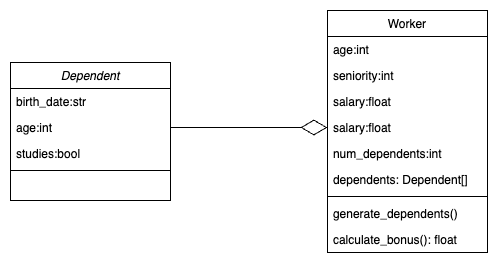

In [ ]:
from typing import List
import random

class Dependent:
    def __init__(self, birth_date: str, age: int, studies: bool):
        self.birth_date = birth_date
        self.age = age
        self.studies = studies

class Worker:
    def __init__(self, age: int, seniority: int, salary: float, num_dependents: int):
        self.age = age
        self.seniority = seniority
        self.salary = salary
        self.num_dependents = num_dependents
        self.dependents: List[Dependent] = []
        self.generate_dependents()

    def generate_dependents(self) -> None:
        for _ in range(self.num_dependents):
            self.dependents.append(Dependent(
                birth_date=f"{random.randint(1, 31)}/{random.randint(1, 12)}/{random.randint(1990, 2025)}",
                age=random.randint(1, 60),
                studies=random.choice([True, False])
            ))

    def calculate_bonus(self) -> float:
        if self.seniority < 5:
            bonus = self.salary * 0.10
        elif self.seniority < 10:
            bonus = self.salary * 0.15
        elif self.seniority < 15:
            bonus = self.salary * 0.25
        else:
            bonus = self.salary * 0.50

        for dependent in self.dependents:
            bonus += bonus * 0.02
            if dependent.studies:
                bonus += bonus * 0.01
        return bonus

def main():
    num_workers: int = 10
    workers: List[Worker] = []
    for _ in range(num_workers):
        workers.append(Worker(
            age=random.randint(25, 65),
            seniority=random.randint(0, 25),
            salary=random.randint(50000, 200000),
            num_dependents=random.randint(0, 5)
        ))

    total_bonus_three_months: float = 0
    for worker in workers:
        total_bonus_three_months += worker.calculate_bonus() * 3

    print(f"The total amount to be paid in three months is: {total_bonus_three_months}")

if __name__ == "__main__":
    main()


The total amount to be paid in three months is: 1242891.7981458753


## **Ejercicio 8:** Flota de Vehículos

Diseña un sistema simplificado para gestionar una flota de vehículos. Crea una clase Vehiculo con atributos como marca, modelo, año, placa (verificar que siempre sea única) y tipo (que puede ser "coche", "camioneta", "motocicleta", etc.), y métodos para mostrar su información y actualizar su estado (por ejemplo, "disponible", "en reparación", "alquilado").  Luego, crea una clase Flota que contenga un diccionario donde las claves sean las placas y los valores sean objetos Vehiculo. La clase Flota debe tener métodos para agregar vehículos (verificando que no haya placas duplicadas), eliminar vehículos, buscar vehículos por placa, listar todos los vehículos de un tipo específico (usando una lista), y calcular el promedio de antigüedad de todos los vehículos en la flota; adicionalmente, implementa un método que retorne una tupla indicando la marca y el modelo del vehículo más antiguo.

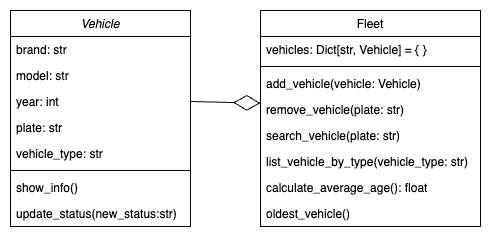

In [ ]:
from typing import Dict

class Vehicle:
    def __init__(self, brand: str, model: str, year: int, plate: str, vehicle_type: str):
        self.brand = brand
        self.model = model
        self.year = year
        self.plate = plate
        self.vehicle_type = vehicle_type
        self.status = "available"

    def show_info(self) -> None:
        print(f"Brand: {self.brand}, Model: {self.model}, Year: {self.year}, Plate: {self.plate}, Type: {self.vehicle_type}, Status: {self.status}")

    def update_status(self, new_status: str) -> None:
        self.status = new_status


class Fleet:
    def __init__(self):
        self.vehicles: Dict[str, Vehicle] = {}

    def add_vehicle(self, vehicle: Vehicle) -> None:
        if vehicle.plate not in self.vehicles:
            self.vehicles[vehicle.plate] = vehicle
            print(f"Vehicle with plate {vehicle.plate} added successfully.")
        else:
            print(f"Error: A vehicle with plate {vehicle.plate} already exists.")

    def remove_vehicle(self, plate: str) -> None:
        if plate in self.vehicles:
            del self.vehicles[plate]
            print(f"Vehicle with plate {plate} removed successfully.")
        else:
            print(f"Error: No vehicle found with plate {plate}.")

    def search_vehicle(self, plate: str) -> None:
        if plate in self.vehicles:
            self.vehicles[plate].show_info()
        else:
            print(f"Error: No vehicle found with plate {plate}.")

    def list_vehicles_by_type(self, vehicle_type: str) -> None:
        vehicles_by_type = [vehicle for vehicle in self.vehicles.values() if vehicle.vehicle_type == vehicle_type]

        for vehicle in vehicles_by_type:
            vehicle.show_info()

        if not vehicles_by_type:
            print(f"No vehicles of type {vehicle_type} found.")

    def calculate_average_age(self) -> float:
        if not self.vehicles:
            return 0  # Avoid division by zero if there are no vehicles

        ages = [2025 - vehicle.year for vehicle in self.vehicles.values()]
        return sum(ages) / len(ages)

    def oldest_vehicle(self) -> Union[tuple[str, str], None]:
        if not self.vehicles:
            return None

        oldest_vehicle = min(self.vehicles.values(), key=lambda v: v.year)
        return (oldest_vehicle.brand, oldest_vehicle.model)
